<h1> <strong> Philippine Dengue Cases Analysis (2016-2020) </strong></h1>
<h2> Analyst: Nichole Allyson D. Calderon </h2> <hr> 

<h3> <strong> Libraries </h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

<h3> <strong> Data Set </h3>

In [2]:
dengue = pd.read_csv('datasets\\dengue.csv')

In [3]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [4]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


<h2> <strong> 10 Questions/Insights </h2>

<h3> 1. Is there a correlation between dengue cases and dengue deaths per region? </h3>

In [5]:
region_dengue = dengue.groupby('Region')[['Dengue_Cases', 'Dengue_Deaths']].sum().reset_index()

In [6]:
region_dengue

,Region,Dengue_Cases,Dengue_Deaths
0,BARMM,11537,332
1,CAR,30582,1008
2,NCR,115966,4008
3,Region I,59066,157
4,Region II,45141,193
5,Region III,131064,482
6,Region IV-A,163029,652
7,Region IV-B,30849,130
8,Region IX,47781,532
9,Region V,22167,185


In [7]:
region_dengue['Dengue_Cases'].corr(region_dengue['Dengue_Deaths'])

np.float64(0.408170286966509)

<h3> Data Visualization </h3>

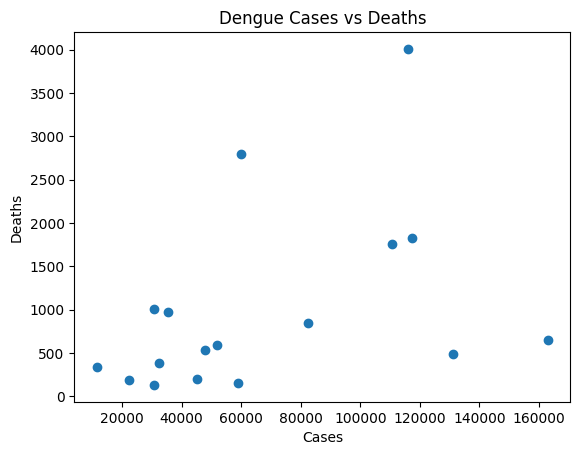

In [8]:
plt.scatter(region_dengue['Dengue_Cases'], region_dengue['Dengue_Deaths'])
plt.xlabel("Cases"); plt.ylabel("Deaths")
plt.title("Dengue Cases vs Deaths")
plt.show()

<h3> 2. What is the average number of dengue cases in Region I in August 2016? </h3>

In [9]:
R1_dengue_cases = dengue[(dengue['Region'] == 'Region I') & (dengue['Month'] == 'August') & (dengue['Year'] == 2016)]['Dengue_Cases'].mean()

In [10]:
R1_dengue_cases

np.float64(1598.0)

<h3> Data Visualization </h3>

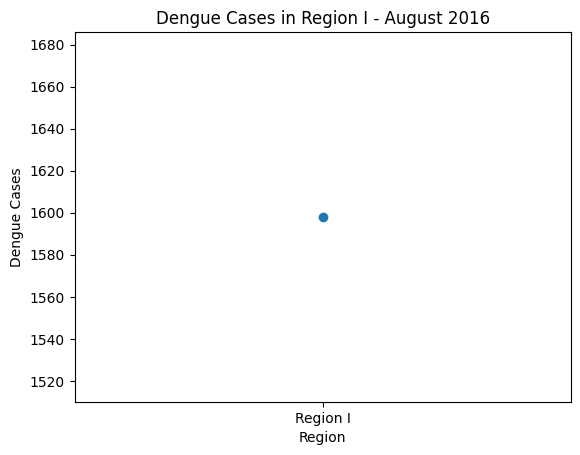

In [11]:
r1_dengue = dengue[(dengue['Region'] == 'Region I') &  (dengue['Month'] == 'August') & (dengue['Year'] == 2016)]

plt.scatter(r1_dengue['Region'], r1_dengue['Dengue_Cases'])
plt.title("Dengue Cases in Region I - August 2016")
plt.xlabel("Region")
plt.ylabel("Dengue Cases")
plt.show()

<h3> 3. Which region had the highest number of dengue cases in January 2020? </h3>

In [12]:
jan_case = dengue[(dengue['Month']=='January') & (dengue['Year']==2020)]

In [13]:
jan_case

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
48,January,2020,Region I,424,1
108,January,2020,Region II,324,4
168,January,2020,Region III,2859,6
228,January,2020,Region IV-A,3175,11
288,January,2020,Region IV-B,320,0
348,January,2020,Region V,404,2
408,January,2020,Region VI,660,0
468,January,2020,Region VII,3389,8
528,January,2020,Region VIII,897,3
588,January,2020,Region IX,577,3


In [14]:
jan_case.groupby('Region')['Dengue_Cases'].sum().reset_index().sort_values('Dengue_Cases', ascending=False)

,Region,Dengue_Cases
11,Region VII,3389
6,Region IV-A,3175
5,Region III,2859
2,NCR,2328
13,Region X,945
16,Region XIII,938
12,Region VIII,897
10,Region VI,660
8,Region IX,577
3,Region I,424


In [15]:
jan_case.groupby('Region')['Dengue_Cases'].sum().reset_index().sort_values('Dengue_Cases', ascending=False).head(1)

,Region,Dengue_Cases
11,Region VII,3389


<h3> Data Visualization </h3>

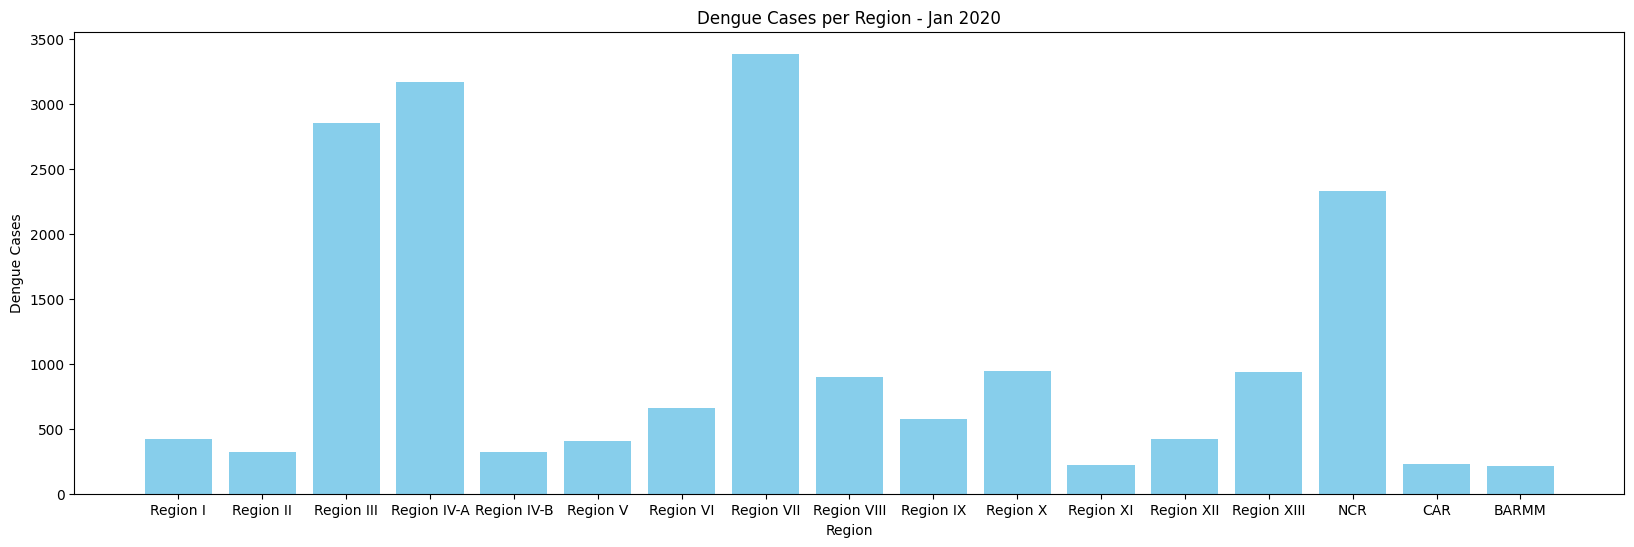

In [16]:
jan_dengue = dengue[(dengue.Month=='January') & (dengue.Year==2020)]
plt.figure(figsize=(20,6))
plt.bar(jan_dengue['Region'], jan_dengue['Dengue_Cases'], color='skyblue')
plt.title('Dengue Cases per Region - Jan 2020')
plt.xlabel('Region')
plt.ylabel('Dengue Cases')
plt.show()

<H3> 4. Does Region IV-A have more dengue cases in December 2017 than Region IV-B? </H3>

In [18]:
dec_dengue = dengue[(dengue['Year']==2017) & (dengue['Month']=='December')]

In [19]:
dec_dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
23,December,2017,Region I,885,3
83,December,2017,Region II,508,2
143,December,2017,Region III,2388,10
203,December,2017,Region IV-A,2828,14
263,December,2017,Region IV-B,189,1
323,December,2017,Region V,339,3
383,December,2017,Region VI,811,8
443,December,2017,Region VII,966,9
503,December,2017,Region VIII,340,2
563,December,2017,Region IX,208,1


In [22]:
IVA_IVB = dec_dengue.groupby('Region')['Dengue_Cases'].sum().loc[['Region IV-A','Region IV-B']]

In [23]:
IVA_IVB

Region
Region IV-A    2828
Region IV-B     189
Name: Dengue_Cases, dtype: int64

<h3> Data Visualization </h3>

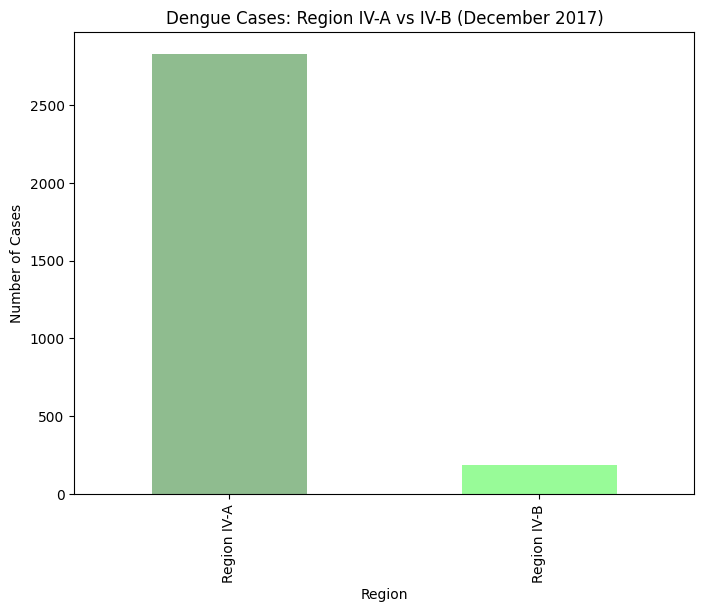

In [26]:
IVA_IVB.plot(kind='bar', color=['darkseagreen','palegreen'], figsize=(8,6))
plt.title('Dengue Cases: Region IV-A vs IV-B (December 2017)')
plt.xlabel('Region')
plt.ylabel('Number of Cases')
plt.show()

<h3> 5. Which region recorded the most dengue deaths in 2017? </h3>

In [32]:
dengue_2017 = dengue[dengue['Year']==2017].groupby('Region')['Dengue_Deaths'].sum().reset_index()

In [33]:
dengue_2017

,Region,Dengue_Deaths
0,BARMM,2
1,CAR,12
2,NCR,168
3,Region I,23
4,Region II,34
5,Region III,81
6,Region IV-A,110
7,Region IV-B,12
8,Region IX,313
9,Region V,24


In [34]:
highest_region = dengue_2017[dengue_2017['Dengue_Deaths']== dengue_2017 ['Dengue_Deaths'].mode()[0]]

In [35]:
highest_region

,Region,Dengue_Deaths
1,CAR,12
7,Region IV-B,12


<h3> Data Visualization </h3>

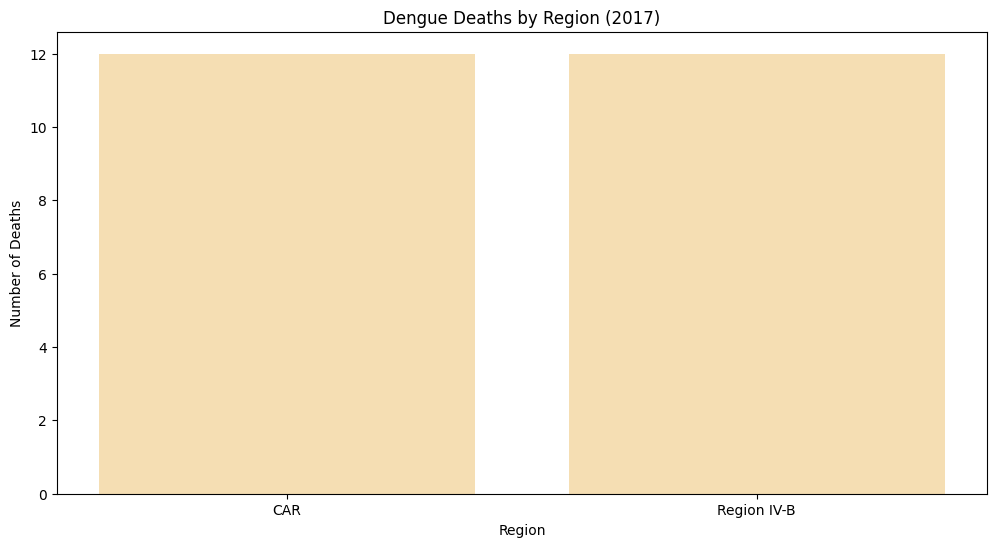

In [45]:
plt.figure(figsize=(12,6))
plt.bar(highest_region['Region'], highest_region['Dengue_Deaths'], color='wheat')
plt.title('Dengue Deaths by Region (2017)')
plt.xlabel('Region')
plt.ylabel('Number of Deaths')
plt.show()